## 1-2. Basic operations on qubits

Now that we have a better understanding of qubits, let us look at how operations on qubits are represented.
This is closely related to the properties of quantum mechanics.

1. Linearity   
In quantum mechanics, the time variation of states (qubits) is always linear (with respect to the superposition of states). In other words, **the operations allowed on a quantum computer are linear transformations** of the state vector.
Since the quantum state of a qubit is represented as a normalized two-dimensional complex vector,
the (linear) operation on a qubit is represented by a $2 \times 2$ **complex matrix**.

2. Unitarity   
Furthermore, from the normalization condition that the sum of the probabilities is always 1, we can derive further restrictions on the linear operations. Since the probability of obtaining each measurement result is given by the square of the absolute value of the complex probability amplitude, the sum of these square is equal to the inner product of the state vector with itself. Therefore, 

$$
|\alpha|^2 + |\beta|^2 =
(\alpha^*, \beta^*)
\left(
\begin{array}{c}
\alpha 
\\
\beta 
\end{array}
\right) = 1.
$$
 
 (Asterisk $^*$ denotes complex conjugation). 
 Let $U$ be the linear transformation (matrix) corresponding to the quantum operation, the state after manipulation by the quantum computer is
 

$$
U
\left(
\begin{array}{c}
\alpha 
\\
\beta 
\end{array}
\right)
$$

Since the normalization condition must hold for this state as well, the following is required
(The dagger $^\dagger$ represents the matrix transpose and complex conjugation both applied, called Hermitian conjugation)

$$
(\alpha^*, \beta^*)
U^\dagger U
\left(
\begin{array}{c}
\alpha 
\\
\beta 
\end{array}
\right) = 1
$$

  Since this relation must hold for any $\alpha$, $\beta$, the quantum operation $U$ corresponds to a **unitary matrix** satisfying the following conditions:
 
$$
U^{\dagger} U = U U^{\dagger} = I.
$$

**That is, the operations on qubits are represented by unitary matrices**.

Let's get our terminology straight. In quantum mechanics, a linear transformation on a state vector is called an **operator**. When we simply refer to an operator, we mean any linear transformation that is not necessarily unitary. On the other hand, a linear transformation that satisfies the above-mentioned unitarity is called a **quantum operation** (quantum gate). Quantum operations can be thought of as (at least theoretically) **physically feasible** operators on quantum states.

### An example of one quantum bit operation: Pauli Operators

**Pauli operators** are the basic quantum operations acting on a single qubit.
These are the most important operators in learning about quantum computers. They are defined by: 

$$
\begin{eqnarray}
I&=&
\left(\begin{array}{cc}
1 & 0
\\
0 & 1
\end{array}
\right),\;\;\;
X=
\left(\begin{array}{cc}
0 & 1
\\
1 & 0
\end{array}
\right),\;\;\;
Y &=&
\left(\begin{array}{cc}
0 & -i
\\
i & 0
\end{array}
\right),\;\;\;
Z=
\left(\begin{array}{cc}
1 & 0
\\
0 & -1
\end{array}
\right).
\end{eqnarray}
$$

Let me explain the image of each operator.

First, $I$ is the identity operator, which in essence means "do nothing".

The $X$ corresponds to the classical bit inversion (NOT), and operates in the following way.
(* Bra-ket notation was used. See also column below.)


$$X|0\rangle = |1\rangle, \;\;
X|1\rangle = |0\rangle
$$
This is a bit flip.

The $Z$ operator reverses the phase of the $|0\rangle$ and $|1\rangle$

$$
Z|0\rangle = |0\rangle, \;\;
Z|1\rangle = -|1\rangle
$$

This is an operation unique to quantum computers that can preserve the  "phase" information of the superposition of $|0\rangle$ and $|1\rangle$.

$$
Z \frac{1}{\sqrt{2}} ( |0\rangle + |1\rangle ) = \frac{1}{\sqrt{2}} ( |0\rangle - |1\rangle ) 
$$

The $Y$ operator can be written as $Y=iXZ$ and
It can be thought of as a combination of phase flip and bit flip (wih the added complex number $i$ ).

(See Nielsen-Chuang's `1.3.1 Single qubit gates` for details).

### One quantum bit operation with SymPy

In SymPy, frequently used basic operations are predefined.

In [1]:
from IPython.display import Image, display_png
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit,QubitBra
init_printing() # to display vectors and matrices nicely

In [2]:
# Please run only on Google Colaboratory
from IPython.display import HTML
def setup_mathjax():
    display(HTML('''
    <script>
        if (!window.MathJax && window.google && window.google.colab) {
            window.MathJax = {
                'tex2jax': {
                    'inlineMath': [['$', '$'], ['\\(', '\\)']],
                    'displayMath': [['$$', '$$'], ['\\[', '\\]']],
                    'processEscapes': true,
                    'processEnvironments': true,
                    'skipTags': ['script', 'noscript', 'style', 'textarea', 'code'],
                    'displayAlign': 'center',
                },
                'HTML-CSS': {
                    'styles': {'.MathJax_Display': {'margin': 0}},
                    'linebreaks': {'automatic': true},
                    // Disable to prevent OTF font loading, which aren't part of our
                    // distribution.
                    'imageFont': null,
                },
               'messageStyle': 'none'
            };
            var script = document.createElement("script");
            script.src = "https://colab.research.google.com/static/mathjax/MathJax.js?config=TeX-AMS_HTML-full,Safe";
            document.head.appendChild(script);
        }
    </script>
    '''))
get_ipython().events.register('pre_run_cell', setup_mathjax)

In [3]:
from sympy.physics.quantum.gate import X,Y,Z,H,S,T,CNOT,SWAP, CPHASE

When defining an operator, it is necessary to specify the index of the target qubit like `X(0)`.
Also, when displaying it as a matrix, you need to specify `nqubits` which is the number of qubits in the quantum circuit .
Here, since there is only one qubit, the index of the qubit is 0. we can use `X(0)` and `nqubits=1`.

In [4]:
X(0)

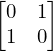

In [5]:
represent(X(0),nqubits=1)  #Pauli X

Similarly, `Y`, `Z`, etc. can be used. In addition, the Hadamard operation `H`, the topological operation `S`, and the topological operation `T` of $\pi/4$ can also be used (these are also common operations, check the definition of these matrices for definitions).

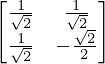

In [6]:
represent(H(0),nqubits=1)

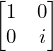

In [7]:
represent(S(0),nqubits=1)

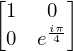

In [8]:
represent(T(0),nqubits=1)

To apply these operations to quantum state, you can use `*`.

In [4]:
ket0 = Qubit('0')
S(0)*Y(0)*X(0)*H(0)*ket0

Use `qapply()` for actual calculation.

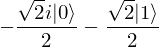

In [16]:
qapply(S(0)*Y(0)*X(0)*H(0)*ket0)

To show column vector representation, you can use `represent`.

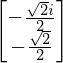

In [17]:
represent(qapply(S(0)*Y(0)*X(0)*H(0)*ket0))

SymPy does all the simple matrix calculations automatically.

---
### Column：Bra-ket notation

At this point, let's take a moment to organize what is called Bra-ket notation, which is often used in quantum mechanics. Once you get used to the bra-ket notation, you can perform calculations very easily and prospectively.

Column vectors are expressed like this

$$
|\psi \rangle = \left( 
\begin{array}{c}
\alpha
\\
\beta 
\end{array}
\right)
$$

We call this **"ket"** . Similarly, row vectors are expressed like this.

$$
\langle \psi | = ( |\psi \rangle ) ^{\dagger} = ( \alpha ^* , \beta ^*)
$$


We call this **"bra"** . ${\dagger}$ mark is a transposition and complex conjugation operation that transposes a column vector into a row vector.


$$
|\psi \rangle = \left( 
\begin{array}{c}
\alpha
\\
\beta 
\end{array}
\right), \;\;\;
|\phi \rangle = \left( 
\begin{array}{c}
\gamma
\\
\delta
\end{array}
\right)
$$

Multiplying a bra a and ket corresponds to **inner product** .

$$
\langle \phi | \psi \rangle = (\gamma ^* , \delta ^* ) \left( 
\begin{array}{c}
\alpha
\\
\beta 
\end{array}
\right) = \gamma ^* \alpha + \delta ^* \beta 
$$


The reason why row and column vectors are called bra kets, respectively, is that when they are lined up like this , they become a "bra ket".

Conversely, if you put them in reverse order

$$
|\phi \rangle \langle \psi | = \left( 
\begin{array}{c}
\gamma
\\
\delta
\end{array}
\right) (\alpha ^* , \beta ^*) = \left( 
\begin{array}{cc}
\gamma \alpha ^*  & \gamma \beta ^* 
\\
\delta \alpha ^*   & \delta \beta ^*
\end{array}
\right)
$$

we get an operator. For example, $X$ operator can be expressed like this.


$$
X= \left( 
\begin{array}{cc}
0 & 1 
\\
1 & 0 
\end{array}
\right)
=
|0\rangle \langle 1 | + |1\rangle \langle 0|
$$

If you memorize this, 

$$
\langle 0| 0\rangle = \langle 1 | 1\rangle = 1, \;\;\; \langle 0 | 1 \rangle = \langle 1 | 0 \rangle = 0
$$

By using these, you can calculate $X |0\rangle$ with only bra and ket ,without matrices


\begin{align}
&X |0\rangle \\
&= \color{red}{(|0\rangle \langle 1 | + |1\rangle \langle 0|) |0\rangle} \\
&= \color{red}{|0\rangle \langle 1 |0\rangle + |1\rangle \langle 0|0\rangle} \\
&= \color{red}{|0\rangle ・ 0 + |1\rangle ・1} \\
&= |1\rangle
\end{align}


**In analytical calculations of quantum information, the elements of a vector are rarely actually written down, but are often written down using bra-ket and then calculated** (when simulating a quantum computer on a classical computer, the entire vector is written down).

Similary, this result is worth memorizing

$$
I = |0\rangle \langle 0 | + |1\rangle \langle 1| , \;\;\; Z = |0\rangle \langle 0| - |1\rangle \langle 1| 
$$
